In [ ]:
# prompt: load a csv from a github link

import pandas as pd

mask_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv'
covid_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

mask_df = pd.read_csv(mask_url)
covid_df = pd.read_csv(covid_url)


In [ ]:
# prompt: rename the COUNTYFP column to 'fips' in the mask_df

mask_df.rename(columns={'COUNTYFP':'fips'}, inplace=True)


In [ ]:
# prompt: can you convert the fips column in mask_df to float

mask_df['fips'] = mask_df['fips'].astype(float)


In [ ]:

# Merge mask usage data with COVID-19 outcome data based on county FIPS code
df = pd.merge(mask_df, covid_df, on="fips", how="inner")

# Display the first few rows of the merged data
print("\nMerged Data:")
print(merged_data.head())

# Check for missing or inconsistent data
print("\nMissing Values:")
print(merged_data.isnull().sum())


print("\nData preparation completed.")



Merged Data:
     fips  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS        date   county  \
0  1001.0  0.053   0.074      0.134       0.295   0.444  2020-03-24  Autauga   
1  1001.0  0.053   0.074      0.134       0.295   0.444  2020-03-25  Autauga   
2  1001.0  0.053   0.074      0.134       0.295   0.444  2020-03-26  Autauga   
3  1001.0  0.053   0.074      0.134       0.295   0.444  2020-03-27  Autauga   
4  1001.0  0.053   0.074      0.134       0.295   0.444  2020-03-28  Autauga   

     state  cases  deaths  
0  Alabama      1     0.0  
1  Alabama      4     0.0  
2  Alabama      6     0.0  
3  Alabama      6     0.0  
4  Alabama      6     0.0  

Missing Values:
fips          0
NEVER         0
RARELY        0
SOMETIMES     0
FREQUENTLY    0
ALWAYS        0
date          0
county        0
state         0
cases         0
deaths        0
dtype: int64

Data preparation completed.


In [ ]:
df.head()


,fips,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,date,county,state,cases,deaths
0,1001.0,0.053,0.074,0.134,0.295,0.444,2020-03-24,Autauga,Alabama,1,0.0
1,1001.0,0.053,0.074,0.134,0.295,0.444,2020-03-25,Autauga,Alabama,4,0.0
2,1001.0,0.053,0.074,0.134,0.295,0.444,2020-03-26,Autauga,Alabama,6,0.0
3,1001.0,0.053,0.074,0.134,0.295,0.444,2020-03-27,Autauga,Alabama,6,0.0
4,1001.0,0.053,0.074,0.134,0.295,0.444,2020-03-28,Autauga,Alabama,6,0.0


In [ ]:
# Group the merged data by county and state, and sum the cases and deaths within each group
df = df.groupby(['county', 'state']).agg({'cases': 'sum', 'deaths': 'sum',
                                                             'NEVER': 'mean', 'RARELY': 'mean',
                                                             'SOMETIMES': 'mean', 'FREQUENTLY': 'mean',
                                                             'ALWAYS': 'mean'}).reset_index()



Aggregated County Data:
      county           state     cases    deaths  NEVER  RARELY  SOMETIMES  \
0  Abbeville  South Carolina   1990471   26081.0  0.117   0.102      0.243   
1     Acadia       Louisiana   5484277  132996.0  0.122   0.111      0.138   
2   Accomack        Virginia   2306179   36094.0  0.001   0.019      0.055   
3        Ada           Idaho  40965355  360167.0  0.118   0.078      0.084   
4      Adair            Iowa    573173   18771.0  0.073   0.128      0.128   

   FREQUENTLY  ALWAYS  
0       0.166   0.371  
1       0.265   0.362  
2       0.100   0.824  
3       0.194   0.526  
4       0.307   0.364  


In [ ]:
# prompt: drop state column from df

df = df.drop(columns=['state'])


In [ ]:
df

,county,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Abbeville,1990471,26081.0,0.117,0.102,0.243,0.166,0.371
1,Acadia,5484277,132996.0,0.122,0.111,0.138,0.265,0.362
2,Accomack,2306179,36094.0,0.001,0.019,0.055,0.100,0.824
3,Ada,40965355,360167.0,0.118,0.078,0.084,0.194,0.526
4,Adair,573173,18771.0,0.073,0.128,0.128,0.307,0.364
...,...,...,...,...,...,...,...,...
3128,Yuma,24611767,515681.0,0.008,0.013,0.046,0.129,0.804
3129,Yuma,632320,9567.0,0.038,0.284,0.133,0.255,0.290
3130,Zapata,1199444,20732.0,0.047,0.001,0.035,0.138,0.779
3131,Zavala,1331119,27227.0,0.036,0.075,0.115,0.138,0.635


In [ ]:
correlation_matrix = df[['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'cases', 'deaths']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               NEVER    RARELY  SOMETIMES  FREQUENTLY    ALWAYS     cases  \
NEVER       1.000000  0.426795   0.321759    0.050664 -0.684556 -0.173205   
RARELY      0.426795  1.000000   0.362627    0.145443 -0.728066 -0.186980   
SOMETIMES   0.321759  0.362627   1.000000    0.074356 -0.668438 -0.179208   
FREQUENTLY  0.050664  0.145443   0.074356    1.000000 -0.517873 -0.130033   
ALWAYS     -0.684556 -0.728066  -0.668438   -0.517873  1.000000  0.257354   
cases      -0.173205 -0.186980  -0.179208   -0.130033  0.257354  1.000000   
deaths     -0.168114 -0.186858  -0.178564   -0.141925  0.260048  0.970211   

              deaths  
NEVER      -0.168114  
RARELY     -0.186858  
SOMETIMES  -0.178564  
FREQUENTLY -0.141925  
ALWAYS      0.260048  
cases       0.970211  
deaths      1.000000  


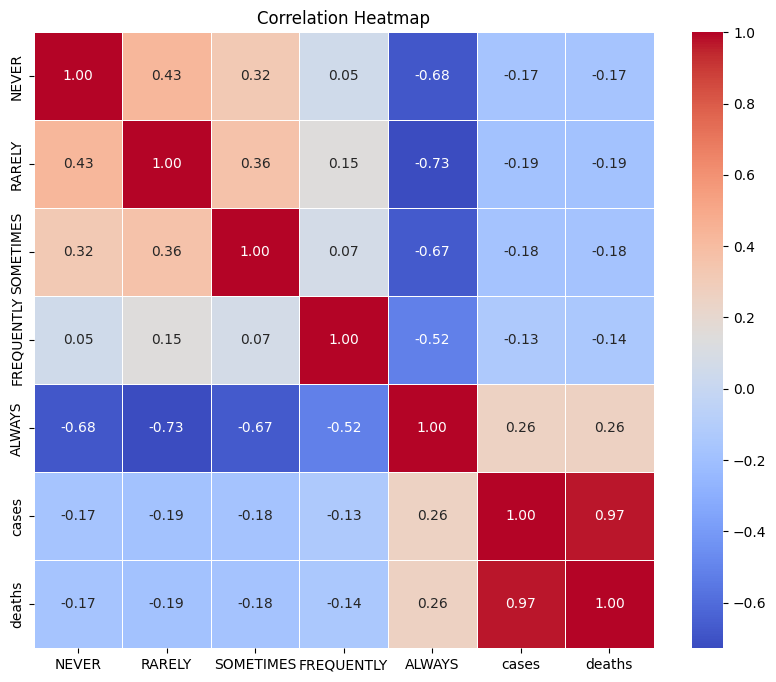

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-58-52b39ace50a8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations, y=labels, palette="viridis")


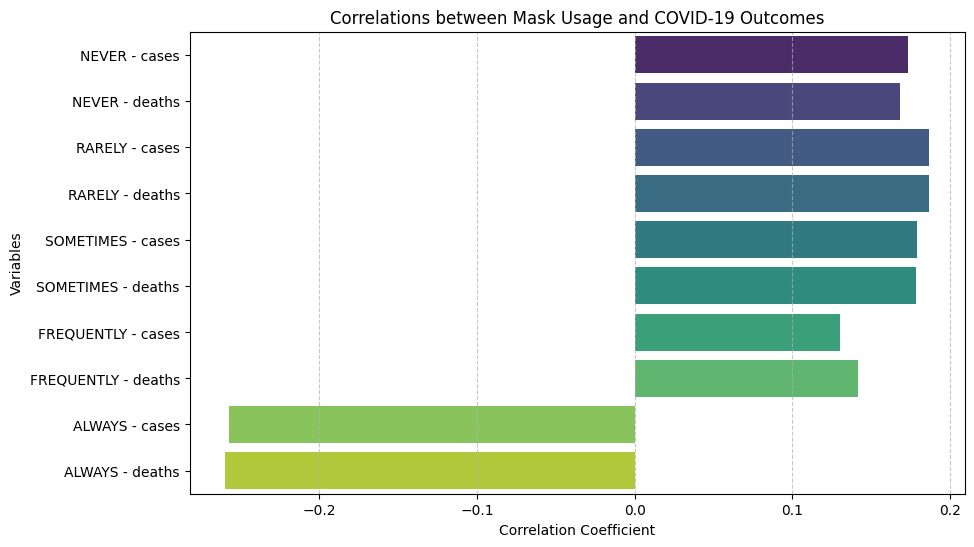

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns of interest
columns_of_interest = ['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'cases', 'deaths']

# Initialize lists to store correlations and labels
correlations = []
labels = []

# Calculate correlations for each pair of variables
for mask_usage in ['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']:
    for outcome in ['cases', 'deaths']:
        correlation = df[mask_usage].corr(df[outcome])
        # Flip the correlation value if negative
        correlation *= -1
        correlations.append(correlation)
        labels.append(f"{mask_usage} - {outcome}")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations, y=labels, palette="viridis")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.title("Correlations between Mask Usage and COVID-19 Outcomes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
